<a href="https://colab.research.google.com/github/dennistay1981/Resources/blob/main/Miscellaneous/EDA%20TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.0 MB/s eta 0:00:00


Import, scale, resample, and plot data

<ipython-input-2-924d0c27a1f2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.index)


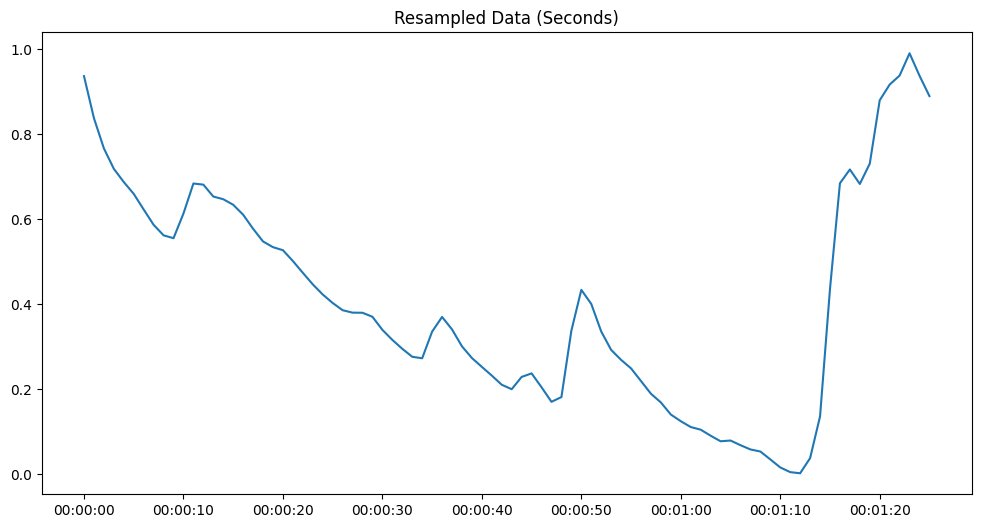

In [2]:
#Import data
data = pd.read_csv('test.csv', index_col='Time')
data.index = pd.to_datetime(data.index)


#Scale data
scaler = MinMaxScaler()
data['scaled'] = scaler.fit_transform(data['SCL'].values.reshape(-1, 1))

#Resample data by seconds
series = data['scaled'].resample('s').mean()

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Resampled Data (Seconds)')
plt.show()


Compute and plot (P)ACF

In [ ]:
lag_acf = acf(series, nlags=20)
lag_pacf = pacf(series, nlags=20, method='ols')


plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(series, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(series, lags=20, method='ols', ax=plt.gca())
plt.title('(P)ACF for XXX condition (XXX.csv)')
plt.show()

Auto fit best ARIMA model

In [3]:
model = auto_arima(series, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)


print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-260.285, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-260.418, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-272.016, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-277.222, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-289.201, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-289.894, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-288.228, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-293.563, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-295.226, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-297.018, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-298.276, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-295.754, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-296.674, Time=0.29 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-298.616, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-298.758, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-296.073, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-299.337, Time=0.35 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-275.243, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-297.536, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-270.039, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-287.321, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0] intercept
Total fit time: 5.264 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 154.669
Date:                Fri, 24 Jan 2025   AIC                           -299.337
Time:                        04:45:35   BIC                           -287.183
Sample:                    01-24-2025   HQIC                          -294.452
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      1.429      0.153      -0.000      

Plot data vs. predictions and evaluate model

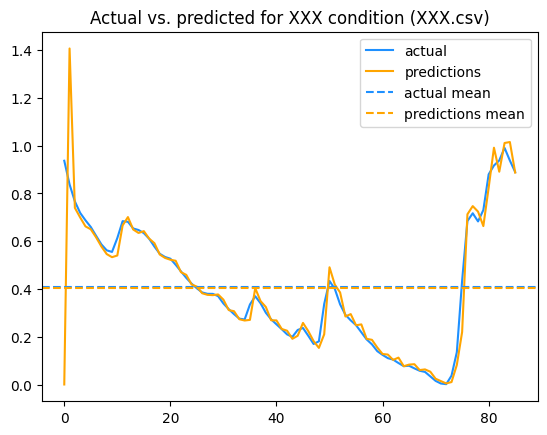

RMSE: 0.12387367528297742
MAPE: 0.145723379287808
R2: 0.7772292262067254
AIC: -299.33736976484477


In [4]:
predictions = model.predict_in_sample()
#Create axes
x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.axhline(y=series.mean(), color='dodgerblue', linestyle='--', label='actual mean')
plt.axhline(y=predictions.mean(), color='orange', linestyle='--', label='predictions mean')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())

Remove first value of series and predictions if the latter is zero, and then replot/re-evaluate

In [ ]:
predictions = predictions[1:]
series = series[1:]


x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.axhline(y=series.mean(), color='dodgerblue', linestyle='--', label='actual mean')
plt.axhline(y=predictions.mean(), color='orange', linestyle='--', label='predictions mean')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())

Train-test approach to diagnose overfitting

In [7]:
series_train = series[:int(len(series) * 0.8)]
series_test = series[int(len(series) * 0.8):]


model = auto_arima(series_train, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)


print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-256.727, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-276.442, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-298.322, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-251.455, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-298.877, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-301.741, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-298.714, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-299.938, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-299.809, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-298.367, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-300.741, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-297.800, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-298.712, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.379 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 155.870
Date:                Fri, 24 Jan 2025   AIC                           -301.741
Time:                        04:47:34   BIC                           -290.717
Sample:                    01-24-2025   HQIC                          -297.379
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#Predict on train and test sets
predictions_train = model.predict_in_sample()
predictions_test = model.predict(n_periods=len(series_test))



# Plotting and evaluation for train set
plt.figure(figsize=(12, 6))
plt.plot(series_train, label="Actual Train")
plt.plot(predictions_train, label="Predicted Train")
plt.legend()
plt.title("Actual vs. Predicted (Train)")
plt.show()

rmse_train = np.sqrt(np.mean((series_train - predictions_train) ** 2))
mape_train = mean_absolute_percentage_error(series_train, predictions_train)
print("Train RMSE:", rmse_train)
print("Train MAPE:", mape_train)


# Plotting and evaluation for test set
plt.figure(figsize=(12, 6))
plt.plot(series_test, label="Actual Test")
plt.plot(predictions_test, label="Predicted Test")
plt.legend()
plt.title("Actual vs. Predicted (Test)")
plt.show()

rmse_test = np.sqrt(np.mean((series_test - predictions_test) ** 2))
mape_test = mean_absolute_percentage_error(series_test, predictions_test)
print("Test RMSE:", rmse_test)
print("Test MAPE:", mape_test)

Compare with SARIMAX (optional)

In [ ]:
import statsmodels.api as sm

model=sm.tsa.SARIMAX(series,order=(1,1,2),seasonal_order = (0,0,0,0), trend='c').fit()   #seasonal_order = (P, D, Q, m)
model.summary()


#Predict
predictions=model.predict(start=0, end=len(series)-1)

#Create axes
x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.legend()
plt.title('Actual vs. predicted for XXX condition (XXX.csv)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())